In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

data_fldr = "/l/mesur/aedinge/distortion_polarization/"

user_cts = pd.read_csv(data_fldr + "231127_user_cts.csv")
ideology_2016 = pd.read_csv(data_fldr + "ideology_estimates_2016_paper.csv")
ideology_2020 = pd.read_csv(data_fldr + "ideology_estimates_2020_paper.csv")

ideology_2016 = ideology_2016.rename(columns={'account_id': 'user_id', 'est':'2016_est'})
ideology_2020 = ideology_2020.rename(columns={'account_id': 'user_id', 'est':'2020_est'})



In [3]:
user_cts

,user_id,2016_distortion,2016_total,2020_distortion,2020_total,2016_prevalence,2020_prevalence
0,394264593,3,13,8,39,0.230769,0.205128
1,22,2,13,16,63,0.153846,0.253968
2,241172528,14,33,7,15,0.424242,0.466667
3,2400190518,14,80,24,102,0.175000,0.235294
4,17825848,25,98,5,13,0.255102,0.384615
...,...,...,...,...,...,...,...
97743,225443793,2,20,8,20,0.100000,0.400000
97744,77594582,11,56,3,35,0.196429,0.085714
97745,14680023,14,52,21,61,0.269231,0.344262
97746,23068646,238,451,8,15,0.527716,0.533333


In [4]:
age_gender = pd.read_csv(data_fldr + "age_gender.csv").rename(columns={'age': 'gen', 'gender':'age', 'account_id':'user_id'}).rename(columns={'gen': 'gender'}).drop_duplicates()

In [9]:
df_all = pd.merge(user_cts, ideology_2016, on='user_id')
df_all = pd.merge(df_all, ideology_2020, on='user_id')
df_all = pd.merge(df_all, age_gender, on='user_id')
# print(len(df_all))
# print(len(df_all[(df_all['2016_total']>10) & (df_all['2020_total']>10)]))

# df_all = df_all[(df_all['2016_total']>10) & (df_all['2020_total']>10)]


df_all['2016_prev'] = df_all['2016_distortion']/df_all['2016_total']
df_all['2020_prev'] = df_all['2020_distortion']/df_all['2020_total']

df_all['cds_pr'] = df_all['2020_prev']/df_all['2016_prev']

# CDS differences by demographic

Threshold # tweets
Finer demographic distribution

Age x gender




PearsonRResult(statistic=0.020525855251323933, pvalue=0.003704745968383388)


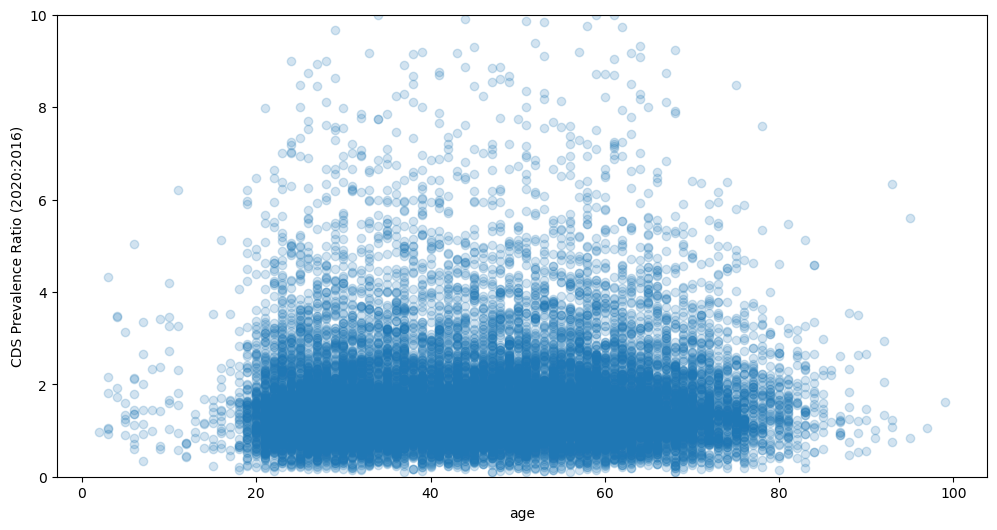

In [162]:
from scipy.stats import pearsonr

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.scatter(x=df_all['age'], y=df_all['cds_pr'], alpha = 0.2)

# ax1.set_title("Political Left")
ax1.set_xlabel("age")
ax1.set_ylabel("CDS Prevalence Ratio (2020:2016)")
ax1.set_ylim([0,10])
# ax1.set_xlim([-2,4.5])

print(stats.pearsonr(df_all['age'], df_all['cds_pr']))

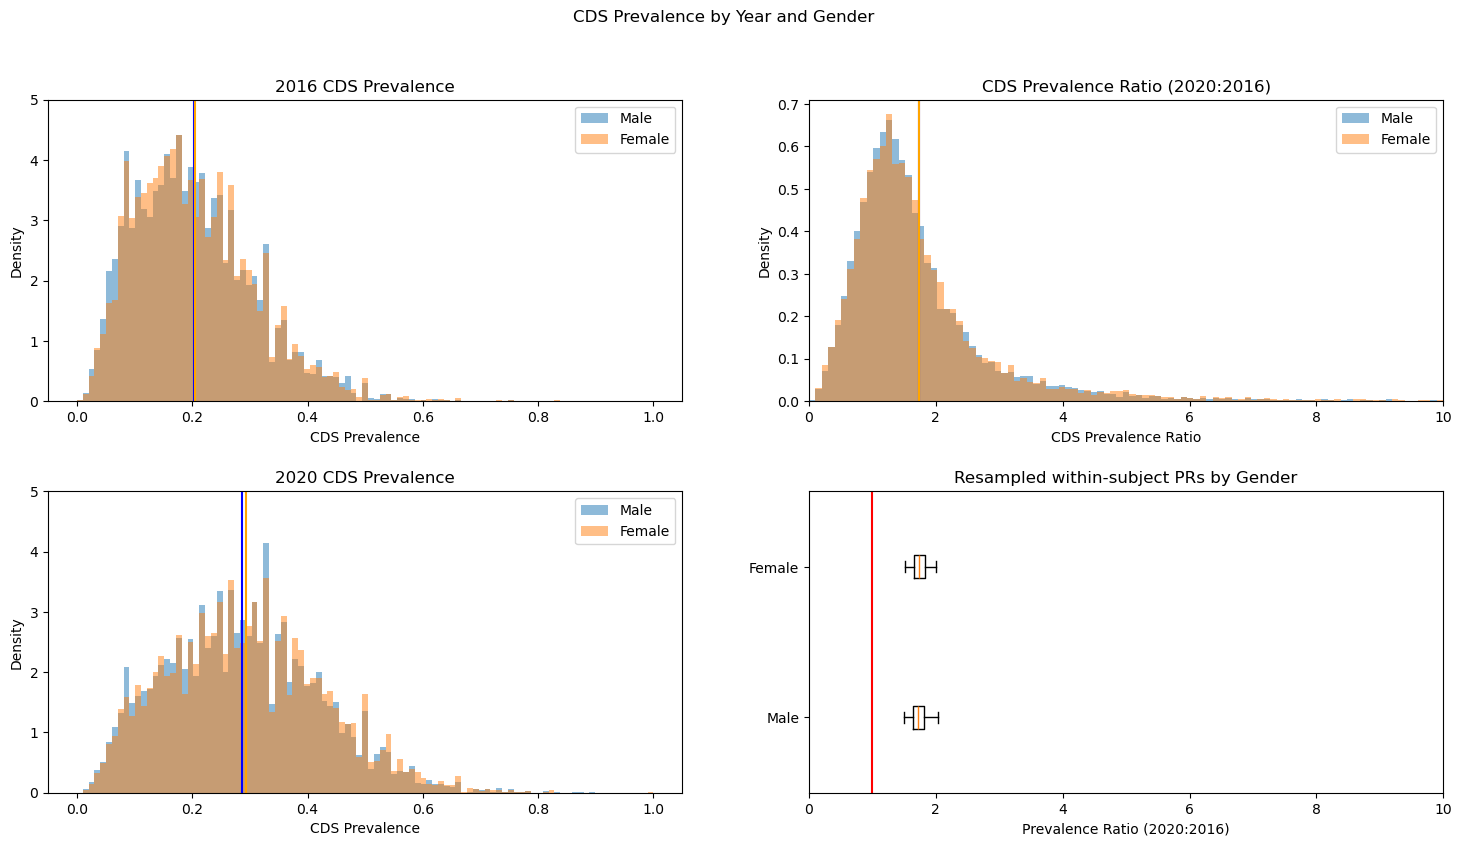

In [255]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(18, 9))

M = df_all[df_all['gender'] == 'Male']
F = df_all[df_all['gender'] == 'Female']

bins = np.linspace(0, 1, 100)

plt.suptitle("CDS Prevalence by Year and Gender")
plt.subplots_adjust(hspace=0.3)

# 2016
ax1.hist(M['2016_prevalence'], bins, density=True, alpha=0.5, label='Male')
ax1.axvline(x=M['2016_prevalence'].mean(), color='blue')

ax1.hist(F['2016_prevalence'], bins, density=True, alpha=0.5, label='Female')
ax1.axvline(x=F['2016_prevalence'].mean(), color='orange')

ax1.set_title("2016 CDS Prevalence")
ax1.set_ylim([0,5])
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence")
ax1.legend(loc='upper right')
# ax1.show()


# 2020
ax2.hist(M['2020_prevalence'], bins, density=True, alpha=0.5, label='Male')
ax2.axvline(x=M['2020_prevalence'].mean(), color='blue')

ax2.hist(F['2020_prevalence'], bins, density=True, alpha=0.5, label='Female')
ax2.axvline(x=F['2020_prevalence'].mean(), color='orange')

ax2.set_title("2020 CDS Prevalence")
ax2.set_ylim([0,5])
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence")
ax2.legend(loc='upper right')


bins_pr = np.linspace(0, 10, 100)


# Prevalence Ratios
ax3.hist(M['cds_pr'], bins_pr, density=True, alpha=0.5, label='Male')
ax3.axvline(x=M['cds_pr'].mean(), color='blue')

ax3.hist(F['cds_pr'], bins_pr, density=True, alpha=0.5, label='Female')
ax3.axvline(x=F['cds_pr'].mean(), color='orange')

ax3.set_title("CDS Prevalence Ratio (2020:2016)")
ax3.set_ylabel("Density")
ax3.set_xlabel("CDS Prevalence Ratio")
ax3.legend(loc='upper right')
ax3.set_xlim([0,10])



# Boxplot
ax4.boxplot(gender, vert=False, showfliers=False, whis=(2.5,97.5))

ax4.set_yticklabels(gender.columns)
ax4.set_xlim([0,10])

ax4.set_xlabel("Prevalence Ratio (2020:2016)")
ax4.set_title("Resampled within-subject PRs by Gender")
ax4.axvline(1, color='r')

plt.savefig('240709_gender_cds.png')

# ax2.plot(x, -y)

### Demographic breakdown:

In [20]:
# age calculated in 2020, convert to generation:
# Baby Boom Generation: Born 1946–1964.
# Generation X: Born 1965–1980.
# Millennial Generation or Generation Y: Born 1981–1996.
# Generation Z or iGen: Born 1997–2012.
# Generation Alpha: Born 2013-2024.
# https://www.pewresearch.org/short-reads/2019/01/17/where-millennials-end-and-generation-z-begins/


print("Demographic Breakdown: ")

total_n = len(user_cts)
total_est = len(age_gender)

print(f"Total users: {total_n}")
print(f"Total with est demographic: {total_est}")
print(f"% with est demographic: {round(total_est/total_n, 4)}", '\n')


def get_generation(age):
    birth_year = 2020 - age
    if birth_year < 1946:
        return "pre-1946"
    elif birth_year < 1965:
        return "Baby Boomer"
    elif birth_year < 1981:
        return "Gen X"
    elif birth_year < 1996:
        return "Millenial"
    elif birth_year < 2013:
        return "Gen Z"
    else:
        return "Gen Alpha"


def age_group(age, age_interval=5, lower_lim=15, upper_lim=65):
    left = (int((age - lower_lim)/age_interval)*age_interval) + lower_lim
    right = (int((age - lower_lim)/age_interval + 1)*age_interval) - 1 + lower_lim
    if left > upper_lim:
        return ">" + str(upper_lim)
    elif right < lower_lim:
        return "<" + str(lower_lim)
    else: 
        return str(left) + "-" + str(right)



gen_ordering = ['pre-1946', 'Baby Boomer', 'Gen X', 'Millenial', 'Gen Z', 'Gen Alpha']

print(f"Age (years), mean (std): {round(df_all['age'].mean(), 2)} ({round(df_all['age'].std(), 2)})", '\n')

# # generation counts
# df_all['generation'] = df_all['age'].apply(get_generation)
# print(df_all.groupby('generation').count()['user_id'][gen_ordering], '\n')

# print((df_all.groupby('generation').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100)[gen_ordering], '\n')

# # gender counts
# print(df_all.groupby('gender').count()['user_id'], '\n')

# print((df_all.groupby('gender').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

# # age group counts
# df_all['age_group'] = df_all['age'].apply(age_group)
# print(df_all.groupby('age_group').count()['user_id'], '\n')

# print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

# age group counts (min 18)
df_all['age_group'] = df_all['age'].apply(age_group, args=(7,18,24))
print(df_all.groupby('age_group').count()['user_id'], '\n')

print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

# df_all['age_group'] = df_all['age'].apply(age_group, args=(10,25,65))
# print(df_all.groupby('age_group').count()['user_id'], '\n')

# print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

        


Demographic Breakdown: 
Total users: 97748
Total with est demographic: 19991
% with est demographic: 0.2045 

Age (years), mean (std): 46.03 (15.65) 

age_group
18-24     1511
<18        106
>24      18374
Name: user_id, dtype: int64 

age_group
18-24     7.56
<18       0.53
>24      91.91
Name: user_id, dtype: float64 



In [21]:
# Printing out demographic counts with latex table formatting

print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

cols = ['age_group', 'gender', 'generation']

for col in cols:
    print('\n', col)
    for label in sorted(list(set(df_all[col]))):
        n = len(df_all[df_all[col]==label])
        percent = (len(df_all[df_all[col]==label]) / len(df_all))*100
        print("\\hspace{3mm}", f"{label} & {n} ({round(percent, 2)}\%) \\\\")

age_group
18-24     7.56
<18       0.53
>24      91.91
Name: user_id, dtype: float64 


 age_group
\hspace{3mm} 18-24 & 1511 (7.56\%) \\
\hspace{3mm} <18 & 106 (0.53\%) \\
\hspace{3mm} >24 & 18374 (91.91\%) \\

 gender
\hspace{3mm} Female & 7882 (39.43\%) \\
\hspace{3mm} Male & 12109 (60.57\%) \\

 generation
\hspace{3mm} Baby Boomer & 5418 (27.1\%) \\
\hspace{3mm} Gen Alpha & 35 (0.18\%) \\
\hspace{3mm} Gen X & 6368 (31.85\%) \\
\hspace{3mm} Gen Z & 1582 (7.91\%) \\
\hspace{3mm} Millenial & 5974 (29.88\%) \\
\hspace{3mm} pre-1946 & 614 (3.07\%) \\


### Resampling:

In [215]:
from tqdm import tqdm

def resample(df, data_col = 'cds_pr', category_col="generation", n=10000, s=100):
    categories = list(set(df[category_col]))
    results = {cat:[] for cat in categories}

    for i in tqdm(range(n)):
        for cat in categories:
            if s == -1:
                rs_size = len(df[df[category_col] == cat])
            else:
                rs_size = s
            rs = df[df[category_col] == cat].sample(n=rs_size, replace=True)
            results[cat].append(rs[data_col].mean())

    return pd.DataFrame(results)

generation_cds = resample(df_all)

meds = generation_cds.median()
meds.sort_values(ascending=True, inplace=True)
generation_cds = generation_cds[meds.index]

gen_ordering = ['Baby Boomer', 'Gen X', 'Millenial', 'Gen Z']
gen_labels = ['Baby Boomers (1946–1964)',
'Gen X (1965–1980)',
'Millennials (1981–1996)',
'Gen Z (1997–2012)']


gender_cds = resample(df_all, data_col = 'cds_pr', category_col="gender",)

meds = gender_cds.median()
meds.sort_values(ascending=True, inplace=True)
gender = gender_cds[meds.index]

100%|████████████████████████████████████| 10000/10000 [01:08<00:00, 146.39it/s]


Baby Boomer : n = 5418
Gen X : n = 6368
Millenial : n = 5974
Gen Z : n = 1582
Female: 97.5 percentile = 2.01, median = 1.73, n = 7882
Male: 2.5 percentile = 2.03, median = 1.72, n = 12109


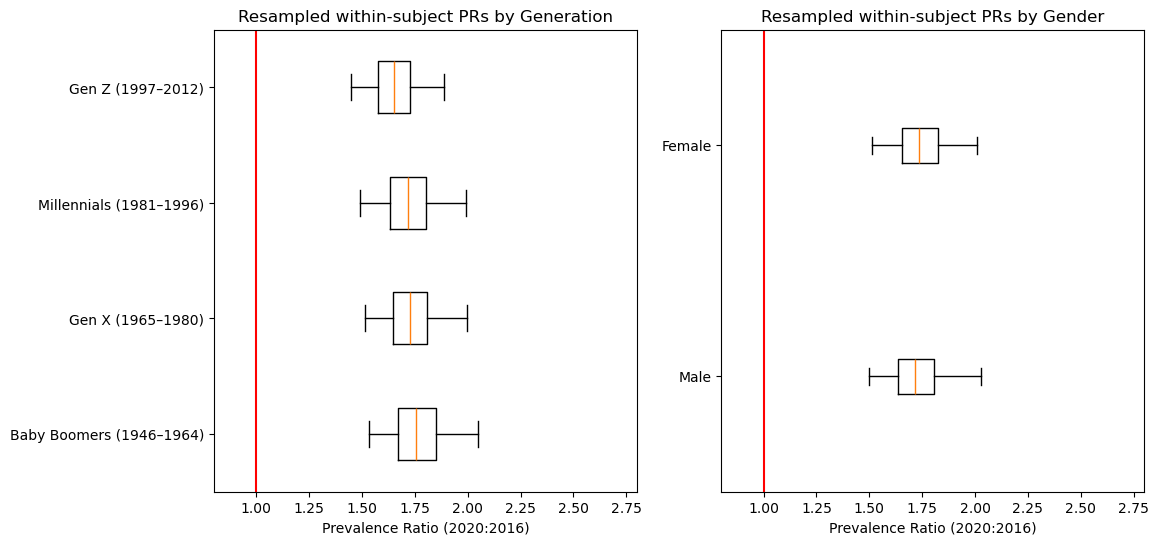

In [219]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(generation_cds[gen_ordering], vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(gen_labels)
ax1.set_xlim([0.8,2.8])

ax1.set_xlabel("Prevalence Ratio (2020:2016)")
ax1.set_title("Resampled within-subject PRs by Generation")
ax1.axvline(1, color='r')

ax2.boxplot(gender, vert=False, showfliers=False, whis=(2.5,97.5))

ax2.set_yticklabels(gender.columns)
ax2.set_xlim([0.8,2.8])

ax2.set_xlabel("Prevalence Ratio (2020:2016)")
ax2.set_title("Resampled within-subject PRs by Gender")
plt.axvline(1, color='r')

for gen in gen_ordering:
    print(gen, ": n =", len(df_all[df_all['generation'] == gen]))

print(f"Female: 97.5 percentile = {round(gender['Female'].sort_values().iloc[9750], 2)}, median = {round(gender['Female'].median(), 2)}, n = {len(df_all[df_all['gender'] == 'Female'])}")
print(f"Male: 2.5 percentile = {round(gender['Male'].sort_values().iloc[9750], 2)}, median = {round(gender['Male'].median(), 2)}, n = {len(df_all[df_all['gender'] == 'Male'])}")

In [217]:
age_cds = resample(df_all, data_col = 'cds_pr', category_col="age_group",)


 90%|██████████████████████████████████▏   | 8997/10000 [05:11<00:34, 29.13it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



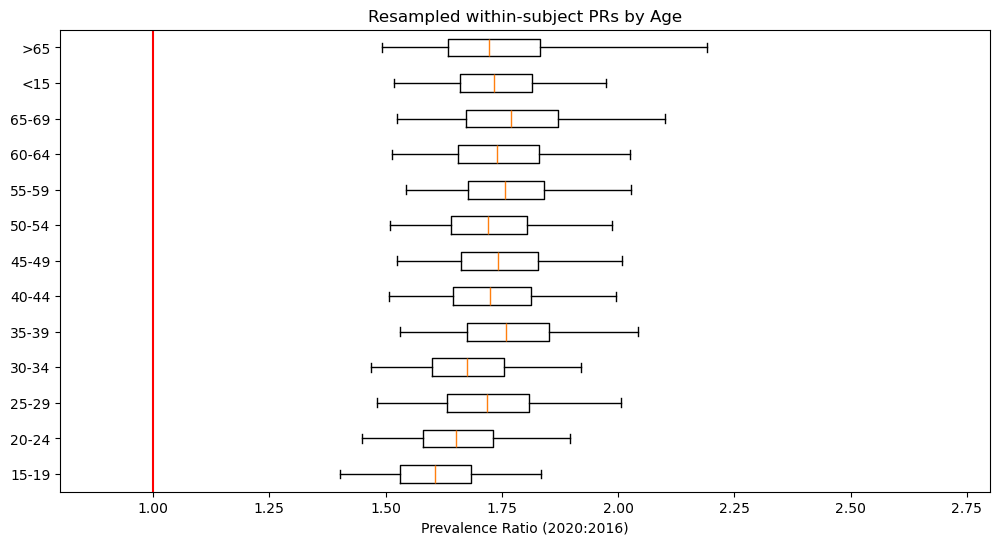

In [218]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))

age_groups = list(age_cds.columns)
age_groups.sort()

ax1.boxplot(age_cds[age_groups], vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(age_groups)
ax1.set_xlim([0.8,2.8])

ax1.set_xlabel("Prevalence Ratio (2020:2016)")
ax1.set_title("Resampled within-subject PRs by Age")
ax1.axvline(1, color='r')

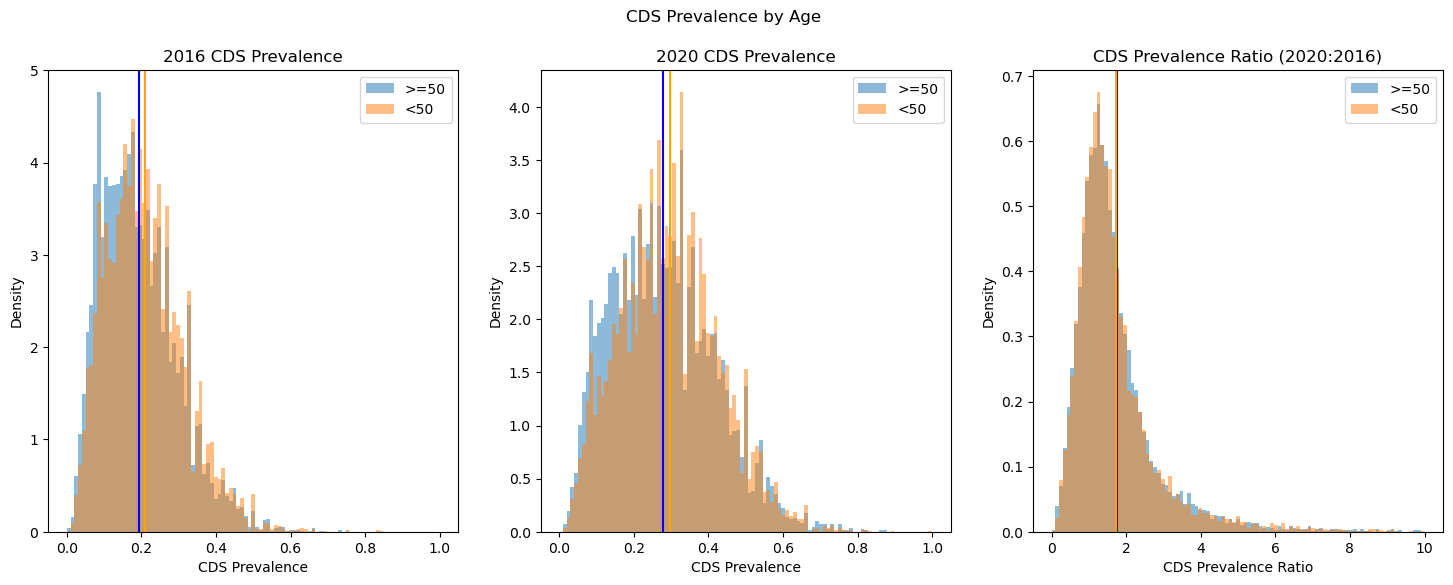

In [206]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

M = df_all[df_all['age'] >= 50]
F = df_all[df_all['age'] < 50]

l1 = '>=50'
l2 = '<50'


bins = np.linspace(0, 1, 100)

plt.suptitle("CDS Prevalence by Age")

# 2016
ax1.hist(M['2016_prevalence'], bins, density=True, alpha=0.5, label=l1)
ax1.axvline(x=M['2016_prevalence'].mean(), color='blue')

ax1.hist(F['2016_prevalence'], bins, density=True, alpha=0.5, label=l2)
ax1.axvline(x=F['2016_prevalence'].mean(), color='orange')

ax1.set_title("2016 CDS Prevalence")
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence")
ax1.legend(loc='upper right')
# ax1.show()


# 2020
ax2.hist(M['2020_prevalence'], bins, density=True, alpha=0.5, label=l1)
ax2.axvline(x=M['2020_prevalence'].mean(), color='blue')

ax2.hist(F['2020_prevalence'], bins, density=True, alpha=0.5, label=l2)
ax2.axvline(x=F['2020_prevalence'].mean(), color='orange')

ax2.set_title("2020 CDS Prevalence")
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence")
ax2.legend(loc='upper right')


bins_pr = np.linspace(0, 10, 100)


# Prevalence Ratios
ax3.hist(M['cds_pr'], bins_pr, density=True, alpha=0.5, label=l1)
ax3.axvline(x=M['cds_pr'].mean(), color='blue')

ax3.hist(F['cds_pr'], bins_pr, density=True, alpha=0.5, label=l2)
ax3.axvline(x=F['cds_pr'].mean(), color='orange')

ax3.set_title("CDS Prevalence Ratio (2020:2016)")
ax3.set_ylabel("Density")
ax3.set_xlabel("CDS Prevalence Ratio")
ax3.legend(loc='upper right')



# ax2.plot(x, -y)

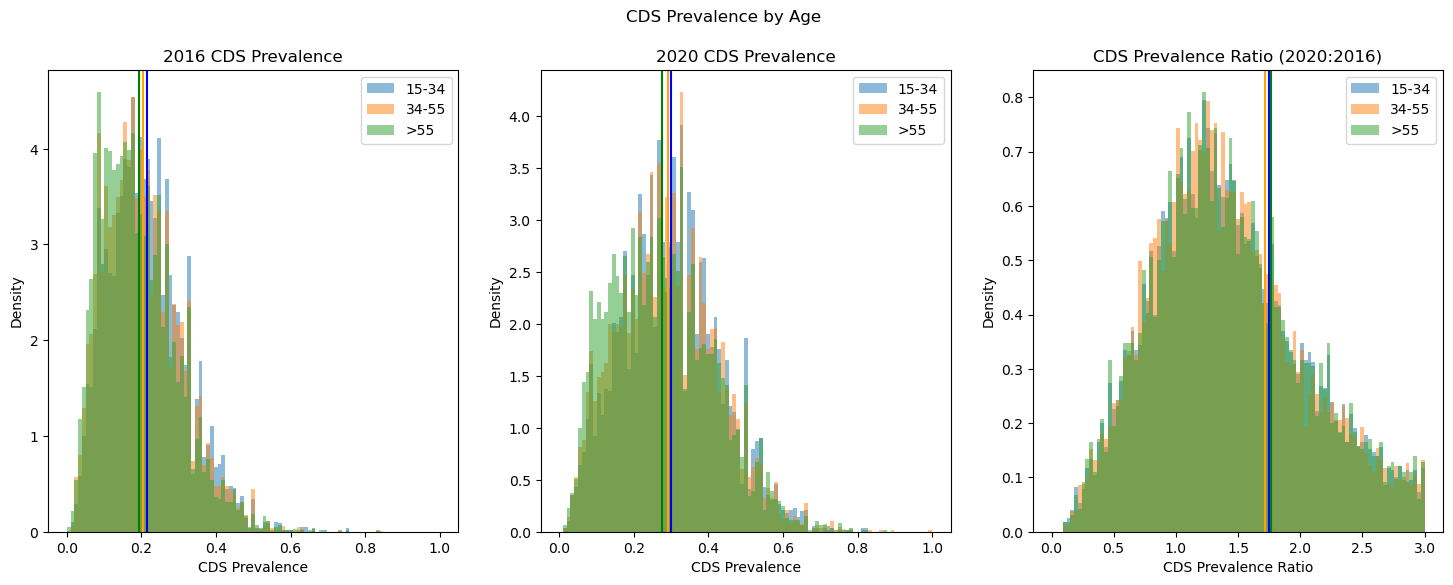

In [208]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

df1 = df_all[(df_all['age'] <= 34) & (df_all['age'] >= 15)]
df2 = df_all[(df_all['age'] <= 54) & (df_all['age'] >= 35)]
df3 = df_all[df_all['age'] > 55]


l1 = '15-34'
l2 = '34-55'
l3 = '>55'


bins = np.linspace(0, 1, 100)

plt.suptitle("CDS Prevalence by Age")

# 2016
ax1.hist(df1['2016_prevalence'], bins, density=True, alpha=0.5, label=l1)
ax1.axvline(x=df1['2016_prevalence'].mean(), color='blue')

ax1.hist(df2['2016_prevalence'], bins, density=True, alpha=0.5, label=l2)
ax1.axvline(x=df2['2016_prevalence'].mean(), color='orange')

ax1.hist(df3['2016_prevalence'], bins, density=True, alpha=0.5, label=l3)
ax1.axvline(x=df3['2016_prevalence'].mean(), color='green')

ax1.set_title("2016 CDS Prevalence")
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence")
ax1.legend(loc='upper right')
# ax1.show()


# 2020
ax2.hist(df1['2020_prevalence'], bins, density=True, alpha=0.5, label=l1)
ax2.axvline(x=df1['2020_prevalence'].mean(), color='blue')

ax2.hist(df2['2020_prevalence'], bins, density=True, alpha=0.5, label=l2)
ax2.axvline(x=df2['2020_prevalence'].mean(), color='orange')

ax2.hist(df3['2020_prevalence'], bins, density=True, alpha=0.5, label=l3)
ax2.axvline(x=df3['2020_prevalence'].mean(), color='green')

ax2.set_title("2020 CDS Prevalence")
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence")
ax2.legend(loc='upper right')


bins_pr = np.linspace(0, 3, 100)


# Prevalence Ratios
ax3.hist(M['cds_pr'], bins_pr, density=True, alpha=0.5, label=l1)
ax3.axvline(x=M['cds_pr'].mean(), color='blue')

ax3.hist(F['cds_pr'], bins_pr, density=True, alpha=0.5, label=l2)
ax3.axvline(x=F['cds_pr'].mean(), color='orange')

ax3.hist(df3['cds_pr'], bins_pr, density=True, alpha=0.5, label=l3)
ax3.axvline(x=df3['cds_pr'].mean(), color='green')

ax3.set_title("CDS Prevalence Ratio (2020:2016)")
ax3.set_ylabel("Density")
ax3.set_xlabel("CDS Prevalence Ratio")
ax3.legend(loc='upper right')



# ax2.plot(x, -y)

In [212]:
ttest = stats.ttest_ind(df_all[df_all['age'] <= 54]['2016_prevalence'], df_all[df_all['age'] > 55]['2016_prevalence']) 
print(ttest)

TtestResult(statistic=10.634739681935567, pvalue=2.423725855855488e-26, df=19586.0)


In [213]:
ttest = stats.ttest_ind(df_all[df_all['age'] <= 54]['2020_prevalence'], df_all[df_all['age'] > 55]['2020_prevalence']) 
print(ttest)

TtestResult(statistic=9.105022336028679, pvalue=9.433122948940545e-20, df=19586.0)


In [214]:
ttest = stats.ttest_ind(df_all[df_all['age'] <= 54]['cds_pr'], df_all[df_all['age'] > 55]['cds_pr']) 
print(ttest)

TtestResult(statistic=-2.2563995101763976, pvalue=0.024056600241529072, df=19586.0)


# Ideology differences by demographic

First  compute the distance from the peak using this function. 

In [ ]:
from scipy.signal import find_peaks
import seaborn as sns

# Generate 2 metrics dist_2016, dist_2020 that are the distance of each user from the peak
def find_peaks_above_threshold(data, threshold = 0.1):
    # Create KDE plot using Seaborn
    sns.kdeplot(data)

    # Get the data from the plot
    x_values = plt.gca().get_lines()[0].get_xdata()
    kde_values = plt.gca().get_lines()[0].get_ydata()

    # Close the plot
    plt.close()

    # Find peaks above the threshold in the KDE curve
    peaks, _ = find_peaks(kde_values, height=threshold)

    # Return x positions of the peaks
    return x_values[peaks]


peaks_2016 = find_peaks_above_threshold(merged_df['est_2016'])
peaks_2020 = find_peaks_above_threshold(merged_df['est_2020'])

positive_peak_value_2016 = peaks_2016[1]
negative_peak_value_2016 = peaks_2016[0]

positive_peak_value_2020 = peaks_2020[1]
negative_peak_value_2020 = peaks_2020[0]


# Function to compute the desired value
def compute_value(est, pos_peak, neg_peak):
    if est > 0:
        return  (pos_peak - est) / pos_peak
    else:
        return  (est-neg_peak) / abs(neg_peak)


middle_users =  merged_df[(merged_df.est_2016>negative_peak_value_2016+0.3) & (merged_df.est_2016<positive_peak_value_2016-0.3)]


# Apply the function to each row
middle_users['dist_2016'] = middle_users['est_2016'].apply(lambda x: compute_value(x, positive_peak_value_2016, negative_peak_value_2016))
middle_users['dist_2020'] = middle_users['est_2020'].apply(lambda x: compute_value(x, positive_peak_value_2020, negative_peak_value_2020))

In [ ]:
# Function to compute the polarizations metric
def compute_metric(x1, x2):
    ratio = x2 / x1 
    metric = 1 - ratio
    return max(0, min(1, metric))